In [7]:
    import roomacoustics
    import numpy as np
    from matplotlib import pyplot as plt

In [8]:
    L = np.array([20, 20, 20])/10
    source_pos = np.array([10, 10, 10])/10
    receiver_pos0 = np.array([10, 10, 10])/10
    receiver_pos10 = np.array([20, 0, 0])/10
    n_samples=2**18
    sampling_rate = 44100

In [9]:
    rir_1, _ = roomacoustics.analytic.rectangular_room_rigid_walls(
            L,
            source_pos,
            receiver_pos0,
            1,
            max_freq=1e3,
            n_samples=n_samples,
            speed_of_sound=343.9)

    rir_2, _ = roomacoustics.analytic.rectangular_room_rigid_walls(
        L,
        source_pos,
        receiver_pos10,
        1,
        max_freq=1e3,
        n_samples=n_samples,
        speed_of_sound=343.9)

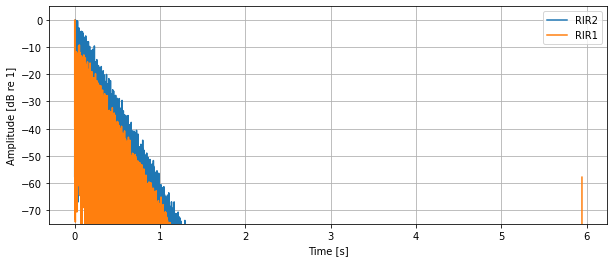

In [10]:
    rir_1 /= np.amax(np.abs(rir_1)) # Normalize 
    rir_2 /= np.amax(np.abs(rir_2)) # Normalize 
    time_vector = np.arange(0, n_samples) / sampling_rate

    # Plot the result:
    plt.figure(figsize=(10, 4))
    roomacoustics.plot_time(rir_2, sampling_rate, label='RIR2')
    roomacoustics.plot_time(rir_1, sampling_rate, label='RIR1')  
    
    
    plt.show()

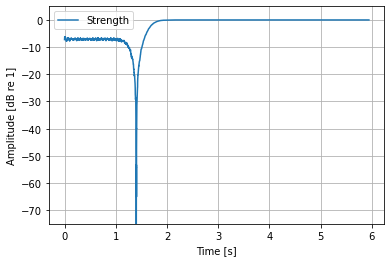

In [11]:

    strength = roomacoustics.strength_energy_decay_curve(rir_1,rir_2)
    strength /= np.amax(np.abs(strength)) # Normalize 

    roomacoustics.plot_time(strength, sampling_rate, label='Strength') 
    plt.show()